In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.cluster import OPTICS

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [6]:
#df= pd.read_csv('seeds_dataset.csv',sep='\s+',  header=None)
df = pd.read_csv('iris.csv')
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data = df.iloc[:,:-1]
y=df.iloc[:,-1]
#стандартизировать функции набора данных в единичном масштабе (среднее значение = 0 и дисперсия = 1)
data = StandardScaler().fit_transform(data)
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [100]:
#clust = OPTICS(min_samples=10, xi=.05, min_cluster_size=.05)
#clust = OPTICS()
#clust = OPTICS (min_samples = 50, xi = .005, min_cluster_size = .05, cluster_method = 'xi', algorithm = 'ball_tree')
clust = OPTICS(eps=0.99, min_samples=8, cluster_method = 'dbscan',algorithm = 'kd_tree')
#clust = OPTICS(min_samples = 10, cluster_method = 'dbscan', eps = 0.8, algorithm = 'ball_tree')

In [101]:
clust.fit(data)

OPTICS(algorithm='kd_tree', cluster_method='dbscan', eps=0.99, min_samples=8)

In [102]:
labels = clust.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Расчетное количество кластеров: %d" % n_clusters_)
print("Расчетное количество точек шума: %d" % n_noise_)
#print(labels)

Расчетное количество кластеров: 2
Расчетное количество точек шума: 3


In [103]:
y_opt = clust.fit_predict(data)
# Данная мера не зависит от самих значений меток, а только от разбиения выборки на кластеры
print("ARI %.3f" % metrics.adjusted_rand_score(y, labels)) 
#не зависит от значений и перестановок меток. Определяется с использованием функции энтропии, интерпретируя разбиения выборки, как дискретные распределения
print("AMI %.3f" % metrics.adjusted_mutual_info_score(y, labels))

print("Гомогенность %.3f" % metrics.homogeneity_score(y, labels))
print("Полнота %.3f" % metrics.completeness_score(y, labels))
print("V-мера %.3f" % metrics.v_measure_score(y, labels))

#данный коэффициент не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, 
#используя только саму (неразмеченную) выборку и результат кластеризации
print("Силуэт %.3f" %  metrics.silhouette_score(data, labels))
#https://habr.com/ru/company/ods/blog/325654/

ARI 0.554
AMI 0.690
Гомогенность 0.576
Полнота 0.877
V-мера 0.696
Силуэт 0.537


In [104]:
# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=n_clusters_).fit(data)
pca_2d = pca.transform(data)

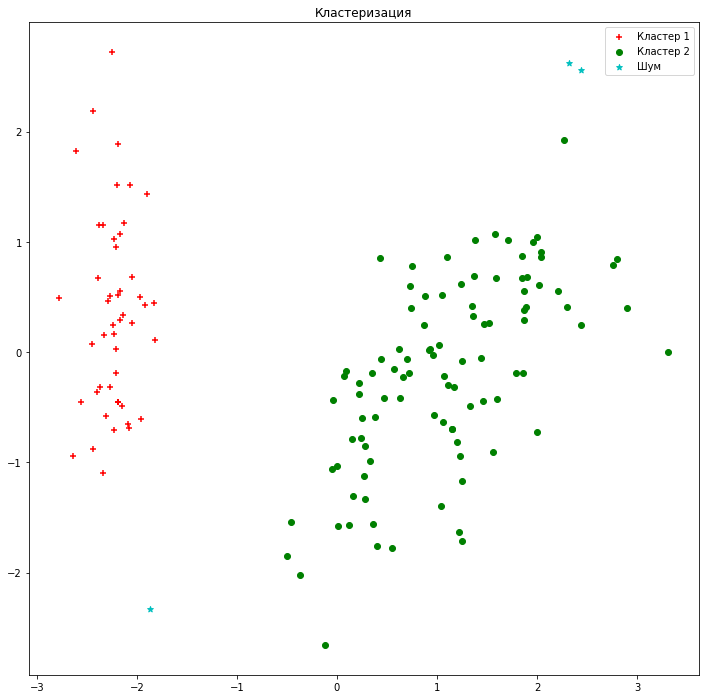

In [105]:
# визуализация
plt.figure(figsize=(12, 12))
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+', label = ' Кластер 1 ')
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o', label = ' Кластер 2 ')
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='^', label = ' Кластер 3 ')   
    elif labels[i] == -1:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='c', marker='*', label = ' Шум ')
    elif labels[i] == 3:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='p', label = ' Кластер 4 ')
    elif labels[i] == 4:
        c6 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='m', marker='v', label = ' Кластер 5 ')  
    elif labels[i] == 5:
        c7 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='k', marker='>', label = ' Кластер 6 ') 
if n_clusters_ == 3:
    plt.legend([c1, c2, c3, c4], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Шум'])
elif n_clusters_ == 2:
    plt.legend([c1, c2, c4], ['Кластер 1', 'Кластер 2', 'Шум'])
elif n_clusters_ == 4:
    plt.legend([c1, c2, c3, c5, c4], ['Кластер 1', 'Кластер 2', 'Кластер 3','Кластер 4', 'Шум'])
elif n_clusters_ == 1:
    plt.legend([c1, c4], ['Кластер 1', 'Шум'])
elif n_clusters_ == 5:
    plt.legend([c1, c2, c3, c5, c6, c4], ['Кластер 1', 'Кластер 2', 'Кластер 3','Кластер 4','Кластер 5', 'Шум'])
elif n_clusters_ == 6:
    plt.legend([c1, c2, c3, c5, c6, c7, c4], ['Кластер 1', 'Кластер 2', 'Кластер 3','Кластер 4','Кластер 5', 'Кластер 6', 'Шум'])
plt.title('Кластеризация')
plt.show()

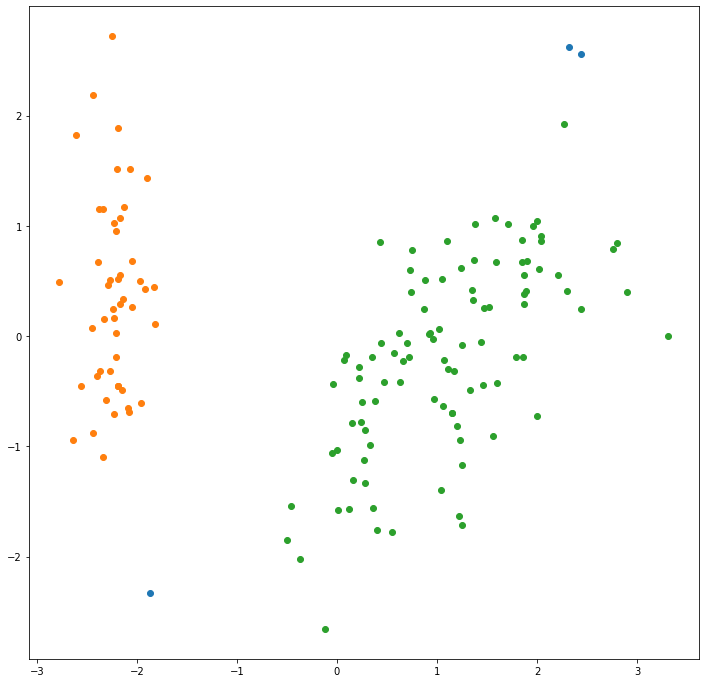

In [106]:
from numpy import unique
from numpy import where
clusters = unique(y_opt)
plt.figure(figsize=(12, 12))
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_opt == cluster)
	# create scatter of these samples
	plt.scatter(pca_2d[row_ix, 0], pca_2d[row_ix, 1])
# show the plot
plt.show()